## Rover Response Optimization

This notebook shows how variables in an fmdtools model can be optimized for resilience.

In [18]:
import sys, os
sys.path.insert(0,os.path.join('..','..','..'))

from fmdtools.modeldef import *
import fmdtools.resultdisp as rd
import fmdtools.faultsim.propagate as prop
import matplotlib.pyplot as plt
import multiprocessing as mp

Model is in defined rover_model.py using assoc_healthstates

In [19]:
from rover_model import Rover, gen_params, plot_map, plot_trajectories

## Optimization

In [43]:
pool = mp.Pool(4)
def obj_func(x):
    x_params = gen_params('sine', ub_f=x[0], lb_f=x[1], ub_t=x[2],lb_t=x[3], ub_d=x[4], lb_d=x[5], cor_f=x[6], cor_d=x[7], cor_t=x[8])
    mdl_set = Rover(params=x_params)
    app_set = SampleApproach(mdl_set, faults='Drive', phases={'global':[0,39]}, defaultsamp={'samp':'evenspacing','numpts':4})
    endclasses_set, mdlhists_set = prop.approach(mdl_set, app_set, staged=True, pool=pool)
    crash_obj = 1000*sum([ec['line_dist'] for ec in endclasses_set.values() if ec['in_bound']==False])
    completion_obj = 10*sum([ec['end_dist'] for ec in endclasses_set.values() if ec['at_finish']==False])
    return crash_obj + completion_obj

In [44]:
obj_func([100,0,2,0,2,-2,0.5,0.5,0.5])

SCENARIOS COMPLETE: 100%|████████████████████████████████████████████████████████████| 140/140 [00:02<00:00, 53.95it/s]


116273.94581434916

In [45]:
from scipy.optimize import minimize
from scipy.optimize import Bounds

In [46]:
bounds = Bounds([0,-1, 0,-1, 0, -100, -10, -100, -10], [100,1,100,1,100,0,100,100,100])


In [47]:
x_0 = [100,0,2,0,2,-2,0,0,0]

In [ ]:
res = minimize(obj_func, x_0, method='trust-constr', bounds=bounds)

SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 126.50it/s]


SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 120.71it/s]


SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 163.14it/s]


SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 134.59it/s]


SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 120.18it/s]


SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 123.68it/s]
C:\Users\dhulse\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 125.33it/s]


SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 121.37it/s]


SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 124.76it/s]


SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 119.38it/s]


SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 115.82it/s]


SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 116.29it/s]


SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 116.08it/s]


SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 110.39it/s]


SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 109.42it/s]

In [26]:
res

 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 335
      cg_stop_cond: 4
            constr: [array([ 9.99976309e+01,  7.36274508e-15,  1.99988945e+00,  7.36274508e-15,
        1.99988945e+00, -1.99988945e+00,  1.51928717e-02,  1.36196958e-01,
       -4.54572689e-02])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 1170.7522611618042
               fun: 44439.49992986697
              grad: array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.00830078,  0.00634766,  0.00244141])
               jac: [<9x9 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>]
   lagrangian_grad: array([ 4.85180885e-12,  9.92616735e-24, -8.02442349e-10,  9.92616735e-24,
       -8.02442349e-10,  8.02442349e-10,  8.21802788e-03,  6.34638697e-03,
        2.41677562e-03

In [27]:
res.x

array([ 9.99976309e+01,  7.36274508e-15,  1.99988945e+00,  7.36274508e-15,
        1.99988945e+00, -1.99988945e+00,  1.51928717e-02,  1.36196958e-01,
       -4.54572689e-02])

In [28]:
res.fun

44439.49992986697

optimal solution:

In [28]:
#x = res.x
#x = [ 1.99967969e+00,  4.54754424e-18,  1.99967969e+00,  4.54754424e-18, 1.99967969e+00, -1.99967969e+00, -1.59566086e-02, -1.14698892e-21, 4.10409934e-02]
#x = [ 20,  4.54754424e-18,  1.99967969e+00,  4.54754424e-18, 1.99967969e+00, -1.99967969e+00, -1.59566086e-02, -1.14698892e-21, 4.10409934e-02]
x = [10, 0, 2, 0, 2, -2, 1, 1, 1.5]
x_params = gen_params('sine', ub_f=x[0], lb_f=x[1], ub_t=x[2],lb_t=x[3], ub_d=x[4], lb_d=x[5], cor_f=x[6], cor_d=x[7], cor_t=x[8])
mdl_opt = Rover(params=x_params)
app_opt = SampleApproach(mdl_opt, faults='Drive', phases='none', defaultsamp={'samp':'evenspacing','numpts':4})
endclasses_opt, mdlhists_opt = prop.approach(mdl_opt, app_opt, staged=True, pool=pool)

SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 156/156 [00:00<00:00, 332.59it/s]


In [29]:
_,_, nomhist = prop.nominal(mdl_opt)

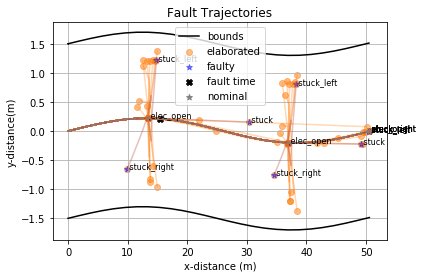

In [30]:
fig = plot_trajectories(mdlhists_opt,nomhist=nomhist, app= app_opt)

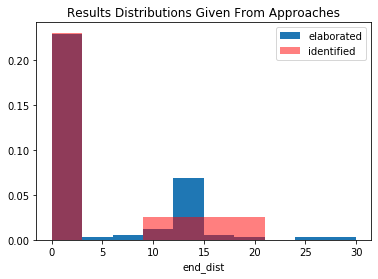

In [31]:
fig = plot_enddist(endclasses_opt, att='end_dist', range=(0,30))

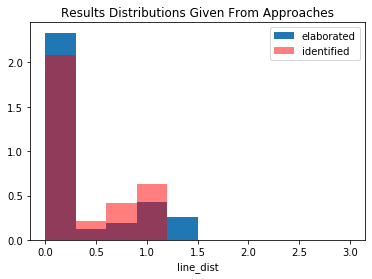

In [32]:
fig = plot_enddist(endclasses_opt)

starting solution:

In [33]:
x = x_0
x_params = gen_params('sine', ub_f=x[0], lb_f=x[1], ub_t=x[2],lb_t=x[3], ub_d=x[4], lb_d=x[5], cor_f=x[6], cor_d=x[7], cor_t=x[8])
mdl_0 = Rover(params=x_params)
app_0 = SampleApproach(mdl_0, faults='Drive', phases='none', defaultsamp={'samp':'evenspacing','numpts':4})
endclasses_0, mdlhists_0 = prop.approach(mdl_0, app_0, staged=True, pool=pool)

SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████████| 156/156 [00:00<00:00, 326.28it/s]


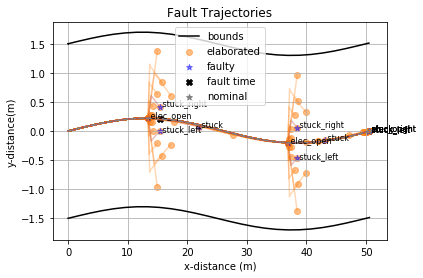

In [34]:
fig = plot_trajectories(mdlhists_0,nomhist=nomhist, app= app_0)

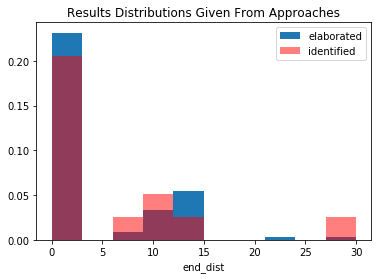

In [35]:
fig = plot_enddist(endclasses_0, att='end_dist', range=(0,30))

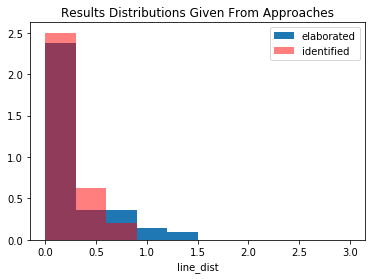

In [36]:
fig = plot_enddist(endclasses_0)

In [37]:
endclasses_0
finish_num_0 = sum([classif['at_finish'] for classif in endclasses_0.values()])
nofinish_num_0 = sum([1 for classif in endclasses_0.values() if classif['at_finish']==False])
finish_num_0, nofinish_num_0

(84, 72)

Text(0.5, 1.0, '')

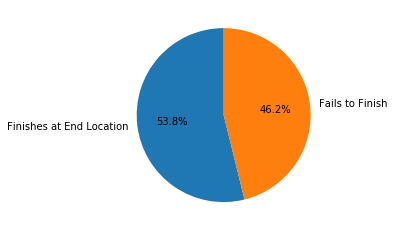

In [38]:
fig1, ax1 = plt.subplots()
ax1.pie([finish_num_0, nofinish_num_0], labels=["Finishes at End Location", "Fails to Finish"], autopct='%1.1f%%', startangle=90)
ax1.set_title("")

In [39]:
endclasses_opt
finish_num_opt = sum([classif['at_finish'] for classif in endclasses_opt.values()])
nofinish_num_opt = sum([1 for classif in endclasses_opt.values() if classif['at_finish']==False])
finish_num_opt, nofinish_num_opt

(86, 70)

Text(0.5, 1.0, '')

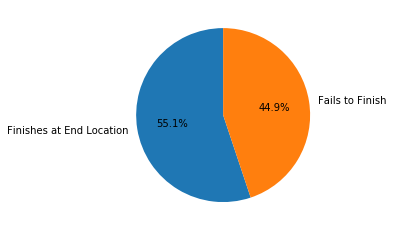

In [40]:
fig1, ax1 = plt.subplots()
ax1.pie([finish_num_opt, nofinish_num_opt], labels=["Finishes at End Location", "Fails to Finish"], autopct='%1.1f%%', startangle=90)
ax1.set_title("")

In [41]:
finish_num_opt = sum([classif['at_finish'] for classif in endclasses_opt.values()])

In [42]:
def plot_mode_contributions(endclasses_opt, mdl):
    frictionmodes = [mode for mode, vals in mdl_0.fxns['Drive'].mode_state_dict.items() if vals.get('friction', 1.0)!=1.0]
    transfermodes = [mode for mode, vals in mdl_0.fxns['Drive'].mode_state_dict.items() if vals.get('transfer', 1.0)!=1.0]
    driftmodes = [mode for mode, vals in mdl_0.fxns['Drive'].mode_state_dict.items() if vals.get('drift', 1.0)!=0.0]
    
    finish_num_opt_drift = sum([classif['at_finish'] for classif in endclasses_opt.values() if classif['faults']['Drive'][0] in driftmodes])
    nofinish_num_opt_drift = sum([not classif['at_finish'] for classif in endclasses_opt.values() if classif['faults']['Drive'][0] in driftmodes])
    finish_num_opt_friction = sum([classif['at_finish'] for classif in endclasses_opt.values() if classif['faults']['Drive'][0] in frictionmodes])
    nofinish_num_opt_friction = sum([not classif['at_finish'] for classif in endclasses_opt.values() if classif['faults']['Drive'][0] in frictionmodes])
    finish_num_opt_transfer = sum([classif['at_finish'] for classif in endclasses_opt.values() if classif['faults']['Drive'][0] in transfermodes])
    nofinish_num_opt_transfer = sum([not classif['at_finish'] for classif in endclasses_opt.values() if classif['faults']['Drive'][0] in transfermodes])
    fig1, ax1 = plt.subplots()
    ax1.pie([finish_num_opt_drift, finish_num_opt_friction, finish_num_opt_transfer, nofinish_num_opt_drift, nofinish_num_opt_friction, nofinish_num_opt_transfer], labels=["Drift-Finished", "Friction-Finished", "Transfer-Finished","Drift-Not Finished", "Friction-Not Finished", "Transfer-Not Finished"], autopct='%1.1f%%', startangle=90)

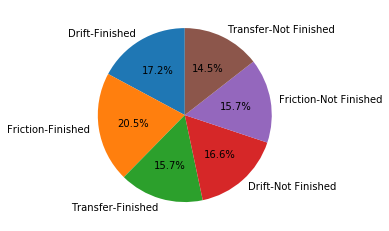

In [43]:
plot_mode_contributions(endclasses_opt, mdl_opt)

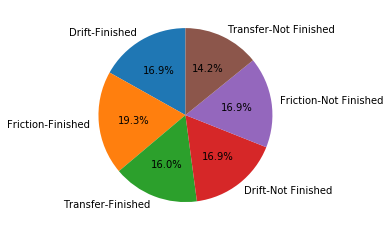

In [44]:
plot_mode_contributions(endclasses_0, mdl_0)

In [165]:
params = gen_params('sine', cor_f=5, cor_d=6)
mdl_thing = Rover(params=params)
_,_, reshist = prop.one_fault(mdl_thing,'Drive','stuck_right', time=15, staged=True)

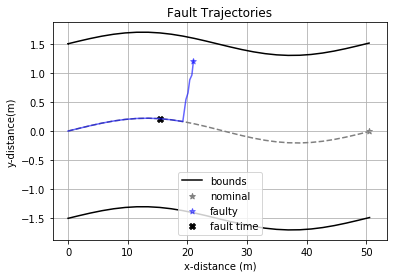

In [166]:
f = plot_trajectories(reshist, nomhist, app_opt, faultalpha=0.6)

In [140]:
reshist['faulty']['flows']['Ground']

{'x': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.71152079,  3.7042791 ,  5.6789045 ,  7.63739226,  9.58270366,
        11.5183353 , 13.4481424 , 15.37615741, 17.3064306 , 19.24288369,
        19.76912675, 20.41527138, 21.05266003, 21.05266003, 21.05266003,
        21.05266003, 21.05266003, 21.05266003, 21.05266003, 21.05266003,
        21.05266003, 21.05266003, 21.05266003, 21.05266003, 21.05266003,
        21.05266003, 21.05266003, 21.05266003, 21.05266003, 21.05266003,
        21.05266003, 21.05266003, 21.05266003, 21.05266003, 21.05266003,
        21.05266003, 21.05266003, 21.05266003, 21.05266003, 21.05266003,
        21.05266003, 21.05266003, 21.05266003, 21.05266003, 21.05266003,
        21.05266003, 21.05266003, 21.05266003, 21.05266003, 21.05266003,
        21.05266003, 21.05266003, 21.05266003, 21.05266003, 21.05266003,
        21.05266003]),
 'y': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04299009, 0.0

In [119]:
_,_, reshist = prop.one_fault(mdl_0,'Drive','stuck_right', time=15, staged=True)

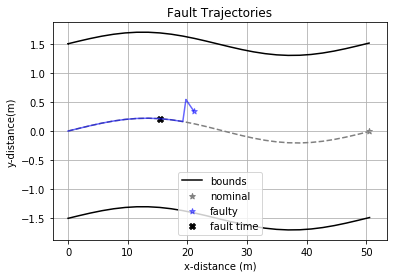

In [120]:
f = plot_trajectories(reshist, nomhist, app_opt, faultalpha=0.6)

In [96]:
reshist['faulty']['flows']['Healthstates']

{'transfer': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'friction': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]),
 'drift': array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])}

In [97]:
reshist['faulty']['functions']['Avionics']

{'faults': {'no_con': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  'CRASH': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
 'mode': array(['standby', 'standby', 'standby', 'standby', 'standby', 'drive',
        'drive', 'drive', 'drive', 'drive', 'drive', 'drive', 'drive',
        'drive', 'drive', 'drive', 'drive', 'drive', 'drive', 'drive',
        'drive', 'drive', 'drive', 'drive', 'drive', 'drive', 'drive',
        'drive', 'drive', 'drive', 'drive', 'drive', 'drive', 'drive',
        'drive', 'drive', 'drive', 'drive', 'drive', 'drive', 'drive',
        'drive', 'drive', 'drive', 'drive', 'drive', 'drive', 'drive',
        'drive', 'drive', 'drive', 'driv

In [98]:
reshist['faulty']['flows']['Ground']

{'x': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.71152079,  3.7042791 ,  5.6789045 ,  7.63739226,  9.58270366,
        11.5183353 , 13.4481424 , 15.37615741, 17.3064306 , 19.24288369,
        19.76912675, 19.70066122, 19.60770838, 19.51782573, 19.42714778,
        19.33635562, 19.24522645, 19.15364131, 19.06137574, 18.9681419 ,
        18.87375309, 18.77836678, 18.68230856, 18.58581616, 18.48903372,
        18.39204864, 18.29491595, 18.19767194, 18.10034155, 18.00294258,
        17.90548812, 17.80798811, 17.7104502 , 17.61288047, 17.51528379,
        17.41766413, 17.32002479, 17.22236851, 17.12469762, 17.02701412,
        16.9293197 , 16.83161586, 16.73390389, 16.63618493, 16.53846   ,
        16.44073   , 16.34299573, 16.24525791, 16.1475172 , 16.04977418,
        16.04977418, 16.04977418, 16.04977418, 16.04977418, 16.04977418,
        16.04977418]),
 'y': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.0429900